# demo_gcfb_v211_speech
- Read and analyze a sample speech sound
- The aumplitude of the input speech sound is normalized by utils.audioread().

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio

import utils
import gcfb_v211 as gcfb

## Set default parameters for the Gammachirp filterbank (GCFB)

In [2]:
class GCparamDefault:
        fs = 48000 # sampling frequency
        num_ch = 100 # number of channels
        f_range = np.array([100, 6000]) # range of center frequencies
        # out_mid_crct = "No" # outer & middle ear correlations
        out_mid_crct = 'ELC' # equal loudness contour (ELC)
        ctrl = 'dynamic' # time-varying
        # ctrl = 'static' # not time-varying (fixed)

## Read a sample speech sound

In [3]:
# stiuli : a samle speech sound
file_name = 'snd_gammachirpy.wav'
path_dir = './sample/'
path_file = path_dir + file_name

# read sample speech
snd, fs = utils.audioread(path_file)
t_snd = len(snd)/fs
t = np.arange(0, len(snd), 1)/fs
print(f"Duration of sound = {t_snd*1000} (ms)")

Duration of sound = 1343.8541666666665 (ms)


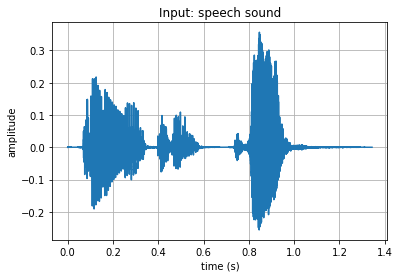

In [4]:
# Plot the input signal
fig, ax = plt.subplots()
ax.plot(t, snd)
ax.set_title("Input: speech sound")
ax.set_xlabel("time (s)")
ax.set_ylabel("amplitude")
plt.grid()

In [5]:
# Play the speech sound
Audio(snd, rate=fs)

## Input level: 40 dB SPL

In [6]:
# sound pressure level (SPL)
dbspl = 40

In [7]:
# Level equalization
snd_eq, _ = utils.eqlz2meddis_hc_level(snd, dbspl)

# GCFB
gc_param = GCparamDefault() # reset all
cgc_out, pgc_out, _, _ = gcfb.gcfb_v211(snd_eq, gc_param)

*** Outer/Middle Ear correction (minimum phase) : ELC ***
*** OutMidCrctFilt: Generating ELC FIR minimum phase filter ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.5 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.9 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 1.1 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 1.3 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 1.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of acf_status
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 1343.9 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 134.4 (ms) / 1343.9 (ms). elapsed time = 10.6 (sec)
Dynamic Compressive-Gammachirp: T

Text(0.5, 0, 'channel')

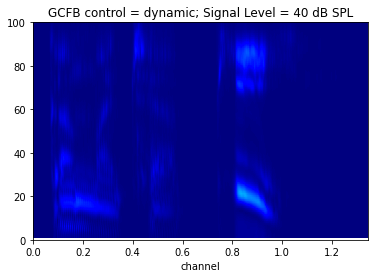

In [8]:
# plot
fig, ax = plt.subplots()
plt.imshow(np.maximum(cgc_out, 0), \
    extent=[min(t), max(t), 1, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_xlabel("channel")

## Input level: 60 dB SPL

In [9]:
# sound pressure level (SPL)
dbspl = 60

In [10]:
# Level equalization
snd_eq, _ = utils.eqlz2meddis_hc_level(snd, dbspl)

# GCFB
gc_param = GCparamDefault() # reset all
cgc_out, pgc_out, _, _ = gcfb.gcfb_v211(snd_eq, gc_param)

*** Outer/Middle Ear correction (minimum phase) : ELC ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.5 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.7 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 1.0 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 1.2 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of acf_status
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 1343.9 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 134.4 (ms) / 1343.9 (ms). elapsed time = 11.4 (sec)
Dynamic Compressive-Gammachirp: Time 268.7 (ms) / 1343.9 (ms). elapsed time = 22.2 (sec)
Dynamic 

Text(0.5, 0, 'channel')

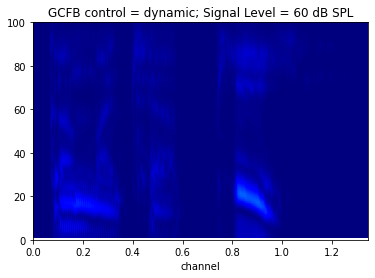

In [11]:
# plot
fig, ax = plt.subplots()
plt.imshow(np.maximum(cgc_out, 0), \
    extent=[min(t), max(t), 1, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_xlabel("channel")